In [1]:
# File to load 
file_to_load = '../resources/steam_games.csv'

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [3]:
games_features = pd.read_csv(file_to_load)

games_features.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


In [4]:
games_data = pd.concat([games_features,games_features["popular_tags"].str.get_dummies(sep=',')], 1)

In [5]:
print(games_data.columns)

Index(['url', 'types', 'name', 'desc_snippet', 'recent_reviews', 'all_reviews',
       'release_date', 'developer', 'publisher', 'popular_tags',
       ...
       'Warhammer 40K', 'Web Publishing', 'Werewolves', 'Western', 'Word Game',
       'World War I', 'World War II', 'Wrestling', 'Zombies', 'e-sports'],
      dtype='object', length=396)


In [6]:
#games_data.columns.tolist()

In [7]:
#games_data

In [8]:
# Get the sum of each column 
tag_sums = games_data.sum()

In [9]:
tag_sums = tag_sums.to_frame()

In [10]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [11]:
#tag_sums

In [12]:
tag_sums = tag_sums.drop(['url'])

In [13]:
#tag_sums

In [14]:
tag_sums = tag_sums.sort_values(by=0)

In [15]:
#tag_sums

In [16]:
unwanted_columns = tag_sums[tag_sums[0] < 100]

In [17]:
#unwanted_columns

In [18]:
unwanted_columns.index

Index(['Skiing', 'Asymmetric VR', 'Snow', 'BMX', 'Snowboarding', 'ATV', 'Jet',
       'Feature Film', 'Skating', 'Foreign',
       ...
       'Politics', 'Dragons', 'Battle Royale', 'Runner', 'Psychedelic',
       'Ninja', 'Political', 'Noir', 'Dungeons & Dragons', 'Dark Comedy'],
      dtype='object', length=152)

In [19]:
games_data = games_data.drop(columns = unwanted_columns.index, axis = 1)

In [20]:
games_data.columns.tolist()

['url',
 'types',
 'name',
 'desc_snippet',
 'recent_reviews',
 'all_reviews',
 'release_date',
 'developer',
 'publisher',
 'popular_tags',
 'game_details',
 'languages',
 'achievements',
 'genre',
 'game_description',
 'mature_content',
 'minimum_requirements',
 'recommended_requirements',
 'original_price',
 'discount_price',
 '1980s',
 "1990's",
 '2.5D',
 '2D',
 '2D Fighter',
 '3D',
 '3D Platformer',
 '4 Player Local',
 '4X',
 'Abstract',
 'Action',
 'Action RPG',
 'Action-Adventure',
 'Addictive',
 'Adventure',
 'Aliens',
 'Alternate History',
 'Animation & Modeling',
 'Anime',
 'Arcade',
 'Arena Shooter',
 'Atmospheric',
 'Audio Production',
 'Base Building',
 "Beat 'em up",
 'Beautiful',
 'Blood',
 'Board Game',
 'Building',
 'Bullet Hell',
 'CRPG',
 'Card Game',
 'Cartoon',
 'Cartoony',
 'Casual',
 'Character Customization',
 'Choices Matter',
 'Choose Your Own Adventure',
 'City Builder',
 'Classic',
 'Clicker',
 'Co-op',
 'Colorful',
 'Comedy',
 'Competitive',
 'Controller',


In [21]:
#games_data.tail(10)

In [22]:
game_data_filtered = games_data.loc[:, '1980s':'Zombies']

In [23]:
#game_data_filtered.head(10)

In [24]:
game_data_name_attribute = games_data.loc[:, 'name':'name']

In [25]:
mergedDf = game_data_name_attribute.merge(game_data_filtered, left_index=True, right_index=True)

In [26]:
popular_tag_name_attribute = games_data.loc[:, 'popular_tags':'popular_tags']

In [27]:
popular_tag_name_attribute.head()

,popular_tags
0,"FPS,Gore,Action,Demons,Shooter,First-Person,Gr..."
1,"Survival,Shooter,Multiplayer,Battle Royale,PvP..."
2,"Mechs,Strategy,Turn-Based,Turn-Based Tactics,S..."
3,"Survival,Zombies,Open World,Multiplayer,PvP,Ma..."
4,"Space,Massively Multiplayer,Sci-fi,Sandbox,MMO..."


In [28]:
merged_data_frame = popular_tag_name_attribute.merge(mergedDf, left_index=True, right_index=True)

In [29]:
merged_data_frame['name'] = merged_data_frame['name'].str.upper()

In [30]:
# File to load 
file_to_load = '../resources/user_reviews.csv'

In [31]:
video_game_sales = pd.read_csv(file_to_load)

video_game_sales.head()

,Unnamed: 0,name,percent_positive_reviews
0,0,Counter-Strike,97.0
1,1,Team Fortress Classic,84.0
2,2,Day of Defeat,90.0
3,3,Deathmatch Classic,83.0
4,4,Half-Life: Opposing Force,95.0


In [32]:
video_game_sales = video_game_sales[['name', 'percent_positive_reviews']]

In [33]:
video_game_sales.head(10)

,name,percent_positive_reviews
0,Counter-Strike,97.0
1,Team Fortress Classic,84.0
2,Day of Defeat,90.0
3,Deathmatch Classic,83.0
4,Half-Life: Opposing Force,95.0
5,Ricochet,80.0
6,Half-Life,96.0
7,Counter-Strike: Condition Zero,89.0
8,Half-Life: Blue Shift,90.0
9,Half-Life 2,97.0


In [34]:
video_game_sales = video_game_sales.dropna()

In [35]:
video_game_sales.shape

(7492, 2)

In [36]:
video_game_sales['name'] = video_game_sales['name'].str.upper()

In [37]:
video_game_sales.shape

(7492, 2)

In [38]:
newly_merged_dataframe = pd.merge(video_game_sales, merged_data_frame, on="name")

In [39]:
newly_merged_dataframe.head(10)

,name,percent_positive_reviews,popular_tags,1980s,1990's,2.5D,2D,2D Fighter,3D,3D Platformer,4 Player Local,4X,Abstract,Action,Action RPG,Action-Adventure,Addictive,Adventure,Aliens,Alternate History,Animation & Modeling,Anime,Arcade,Arena Shooter,Atmospheric,Audio Production,Base Building,Beat 'em up,Beautiful,Blood,Board Game,Building,Bullet Hell,CRPG,Card Game,Cartoon,Cartoony,Casual,Character Customization,Choices Matter,Choose Your Own Adventure,City Builder,Classic,Clicker,Co-op,Colorful,Comedy,Competitive,Controller,Crafting,Crime,Cult Classic,Cute,Cyberpunk,Dark,Dark Fantasy,Dark Humor,Dating Sim,Demons,Design & Illustration,Destruction,Detective,Difficult,Dinosaurs,Drama,Driving,Dungeon Crawler,Dystopian,Early Access,Economy,Education,Episodic,Experimental,Exploration,FPS,Family Friendly,Fantasy,Fast-Paced,Female Protagonist,Fighting,First-Person,Flight,Free to Play,Funny,Futuristic,Game Development,GameMaker,Gore,Grand Strategy,Great Soundtrack,Hack and Slash,Hand-drawn,Hex Grid,Hidden Object,Historical,Horror,Illuminati,Indie,Interactive Fiction,Isometric,JRPG,Kickstarter,Level Editor,Local Co-Op,Local Multiplayer,Logic,Loot,Lovecraftian,MMORPG,Magic,Management,Massively Multiplayer,Masterpiece,Match 3,Mature,Mechs,Medieval,Memes,Metroidvania,Military,Minimalist,Moddable,Mouse only,Movie,Multiplayer,Multiple Endings,Music,Mystery,Narration,Naval,Nudity,Old School,Online Co-Op,Open World,Otome,Parkour,Party-Based RPG,Perma Death,Physics,Pirates,Pixel Graphics,Platformer,Point & Click,Post-apocalyptic,Procedural Generation,Psychological,Psychological Horror,Puzzle,Puzzle-Platformer,PvE,PvP,RPG,RPGMaker,RTS,Racing,Real Time Tactics,Real-Time,Real-Time with Pause,Realistic,Relaxing,Remake,Replay Value,Resource Management,Retro,Rhythm,Robots,Rogue-like,Rogue-lite,Romance,Sandbox,Sci-fi,Science,Score Attack,Sexual Content,Shoot 'Em Up,Shooter,Short,Side Scroller,Simulation,Singleplayer,Software,Software Training,Soundtrack,Space,Space Sim,Split Screen,Sports,Stealth,Steampunk,Story Rich,Strategy,Strategy RPG,Stylized,Surreal,Survival,Survival Horror,Tactical,Tactical RPG,Tanks,Team-Based,Text-Based,Third Person,Third-Person Shooter,Thriller,Time Management,Top-Down,Top-Down Shooter,Touch-Friendly,Tower Defense,Trains,Turn-Based,Turn-Based Combat,Turn-Based Strategy,Turn-Based Tactics,Twin Stick Shooter,Utilities,VR,Video Production,Violent,Visual Novel,Voxel,Walking Simulator,War,Wargame,Web Publishing,World War II,Zombies
0,COUNTER-STRIKE,97.0,"Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...",1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TEAM FORTRESS CLASSIC,84.0,"Action,FPS,Multiplayer,Classic,Shooter,Team-Ba...",0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,DAY OF DEFEAT,90.0,"FPS,World War II,Multiplayer,Shooter,Action,Wa...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,

In [40]:
newly_merged_dataframe.shape

(6213, 227)

In [41]:
newly_merged_dataframe.columns = newly_merged_dataframe.columns.str.replace(' ', '_')

In [42]:
newly_merged_dataframe.columns = newly_merged_dataframe.columns.str.replace("'", '')

In [43]:
newly_merged_dataframe.columns = newly_merged_dataframe.columns.str.replace("&", 'and')

In [44]:
newly_merged_dataframe.columns = newly_merged_dataframe.columns.str.replace("-", '_')

In [45]:
newly_merged_dataframe.head()

,name,percent_positive_reviews,popular_tags,1980s,1990s,2.5D,2D,2D_Fighter,3D,3D_Platformer,4_Player_Local,4X,Abstract,Action,Action_RPG,Action_Adventure,Addictive,Adventure,Aliens,Alternate_History,Animation_and_Modeling,Anime,Arcade,Arena_Shooter,Atmospheric,Audio_Production,Base_Building,Beat_em_up,Beautiful,Blood,Board_Game,Building,Bullet_Hell,CRPG,Card_Game,Cartoon,Cartoony,Casual,Character_Customization,Choices_Matter,Choose_Your_Own_Adventure,City_Builder,Classic,Clicker,Co_op,Colorful,Comedy,Competitive,Controller,Crafting,Crime,Cult_Classic,Cute,Cyberpunk,Dark,Dark_Fantasy,Dark_Humor,Dating_Sim,Demons,Design_and_Illustration,Destruction,Detective,Difficult,Dinosaurs,Drama,Driving,Dungeon_Crawler,Dystopian,Early_Access,Economy,Education,Episodic,Experimental,Exploration,FPS,Family_Friendly,Fantasy,Fast_Paced,Female_Protagonist,Fighting,First_Person,Flight,Free_to_Play,Funny,Futuristic,Game_Development,GameMaker,Gore,Grand_Strategy,Great_Soundtrack,Hack_and_Slash,Hand_drawn,Hex_Grid,Hidden_Object,Historical,Horror,Illuminati,Indie,Interactive_Fiction,Isometric,JRPG,Kickstarter,Level_Editor,Local_Co_Op,Local_Multiplayer,Logic,Loot,Lovecraftian,MMORPG,Magic,Management,Massively_Multiplayer,Masterpiece,Match_3,Mature,Mechs,Medieval,Memes,Metroidvania,Military,Minimalist,Moddable,Mouse_only,Movie,Multiplayer,Multiple_Endings,Music,Mystery,Narration,Naval,Nudity,Old_School,Online_Co_Op,Open_World,Otome,Parkour,Party_Based_RPG,Perma_Death,Physics,Pirates,Pixel_Graphics,Platformer,Point_and_Click,Post_apocalyptic,Procedural_Generation,Psychological,Psychological_Horror,Puzzle,Puzzle_Platformer,PvE,PvP,RPG,RPGMaker,RTS,Racing,Real_Time_Tactics,Real_Time,Real_Time_with_Pause,Realistic,Relaxing,Remake,Replay_Value,Resource_Management,Retro,Rhythm,Robots,Rogue_like,Rogue_lite,Romance,Sandbox,Sci_fi,Science,Score_Attack,Sexual_Content,Shoot_Em_Up,Shooter,Short,Side_Scroller,Simulation,Singleplayer,Software,Software_Training,Soundtrack,Space,Space_Sim,Split_Screen,Sports,Stealth,Steampunk,Story_Rich,Strategy,Strategy_RPG,Stylized,Surreal,Survival,Survival_Horror,Tactical,Tactical_RPG,Tanks,Team_Based,Text_Based,Third_Person,Third_Person_Shooter,Thriller,Time_Management,Top_Down,Top_Down_Shooter,Touch_Friendly,Tower_Defense,Trains,Turn_Based,Turn_Based_Combat,Turn_Based_Strategy,Turn_Based_Tactics,Twin_Stick_Shooter,Utilities,VR,Video_Production,Violent,Visual_Novel,Voxel,Walking_Simulator,War,Wargame,Web_Publishing,World_War_II,Zombies
0,COUNTER-STRIKE,97.0,"Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...",1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TEAM FORTRESS CLASSIC,84.0,"Action,FPS,Multiplayer,Classic,Shooter,Team-Ba...",0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,DAY OF DEFEAT,90.0,"FPS,World War II,Multiplayer,Shooter,Action,Wa...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0

In [46]:
newly_merged_dataframe = newly_merged_dataframe.rename(columns = {"1980s": "Tag_1980s",
                                                                  "1990s": "Tag_1990s",
                                                                  "2.5D": "Tag_2_5D",
                                                                  "2D": "Tag_2D", 
                                                                  "2D_Fighter": "Tag_2D_Fighter",
                                                                  "3D": "Tag_3D",
                                                                  "3D_Platformer": "Tag_3D_Platformer",
                                                                  "4_Player_Local": "Tag_4_Player_Local",
                                                                  "4X": "Tag_4X"})

In [47]:
newly_merged_dataframe.dtypes

name                          object
percent_positive_reviews     float64
popular_tags                  object
Tag_1980s                      int64
Tag_1990s                      int64
Tag_2_5D                       int64
Tag_2D                         int64
Tag_2D_Fighter                 int64
Tag_3D                         int64
Tag_3D_Platformer              int64
Tag_4_Player_Local             int64
Tag_4X                         int64
Abstract                       int64
Action                         int64
Action_RPG                     int64
Action_Adventure               int64
Addictive                      int64
Adventure                      int64
Aliens                         int64
Alternate_History              int64
Animation_and_Modeling         int64
Anime                          int64
Arcade                         int64
Arena_Shooter                  int64
Atmospheric                    int64
Audio_Production               int64
Base_Building                  int64
B

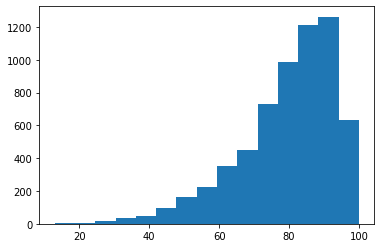

In [48]:
plt.hist(newly_merged_dataframe['percent_positive_reviews'], bins = 15)
plt.show()

In [49]:
#newly_merged_dataframe.to_csv(r'./Mock_Data2.csv', index = False)

In [50]:
newly_merged_dataframe.duplicated(subset=["name"])

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [51]:
newly_merged_dataframe.shape

(6213, 227)

In [52]:
newly_merged_dataframe.head()

,name,percent_positive_reviews,popular_tags,Tag_1980s,Tag_1990s,Tag_2_5D,Tag_2D,Tag_2D_Fighter,Tag_3D,Tag_3D_Platformer,Tag_4_Player_Local,Tag_4X,Abstract,Action,Action_RPG,Action_Adventure,Addictive,Adventure,Aliens,Alternate_History,Animation_and_Modeling,Anime,Arcade,Arena_Shooter,Atmospheric,Audio_Production,Base_Building,Beat_em_up,Beautiful,Blood,Board_Game,Building,Bullet_Hell,CRPG,Card_Game,Cartoon,Cartoony,Casual,Character_Customization,Choices_Matter,Choose_Your_Own_Adventure,City_Builder,Classic,Clicker,Co_op,Colorful,Comedy,Competitive,Controller,Crafting,Crime,Cult_Classic,Cute,Cyberpunk,Dark,Dark_Fantasy,Dark_Humor,Dating_Sim,Demons,Design_and_Illustration,Destruction,Detective,Difficult,Dinosaurs,Drama,Driving,Dungeon_Crawler,Dystopian,Early_Access,Economy,Education,Episodic,Experimental,Exploration,FPS,Family_Friendly,Fantasy,Fast_Paced,Female_Protagonist,Fighting,First_Person,Flight,Free_to_Play,Funny,Futuristic,Game_Development,GameMaker,Gore,Grand_Strategy,Great_Soundtrack,Hack_and_Slash,Hand_drawn,Hex_Grid,Hidden_Object,Historical,Horror,Illuminati,Indie,Interactive_Fiction,Isometric,JRPG,Kickstarter,Level_Editor,Local_Co_Op,Local_Multiplayer,Logic,Loot,Lovecraftian,MMORPG,Magic,Management,Massively_Multiplayer,Masterpiece,Match_3,Mature,Mechs,Medieval,Memes,Metroidvania,Military,Minimalist,Moddable,Mouse_only,Movie,Multiplayer,Multiple_Endings,Music,Mystery,Narration,Naval,Nudity,Old_School,Online_Co_Op,Open_World,Otome,Parkour,Party_Based_RPG,Perma_Death,Physics,Pirates,Pixel_Graphics,Platformer,Point_and_Click,Post_apocalyptic,Procedural_Generation,Psychological,Psychological_Horror,Puzzle,Puzzle_Platformer,PvE,PvP,RPG,RPGMaker,RTS,Racing,Real_Time_Tactics,Real_Time,Real_Time_with_Pause,Realistic,Relaxing,Remake,Replay_Value,Resource_Management,Retro,Rhythm,Robots,Rogue_like,Rogue_lite,Romance,Sandbox,Sci_fi,Science,Score_Attack,Sexual_Content,Shoot_Em_Up,Shooter,Short,Side_Scroller,Simulation,Singleplayer,Software,Software_Training,Soundtrack,Space,Space_Sim,Split_Screen,Sports,Stealth,Steampunk,Story_Rich,Strategy,Strategy_RPG,Stylized,Surreal,Survival,Survival_Horror,Tactical,Tactical_RPG,Tanks,Team_Based,Text_Based,Third_Person,Third_Person_Shooter,Thriller,Time_Management,Top_Down,Top_Down_Shooter,Touch_Friendly,Tower_Defense,Trains,Turn_Based,Turn_Based_Combat,Turn_Based_Strategy,Turn_Based_Tactics,Twin_Stick_Shooter,Utilities,VR,Video_Production,Violent,Visual_Novel,Voxel,Walking_Simulator,War,Wargame,Web_Publishing,World_War_II,Zombies
0,COUNTER-STRIKE,97.0,"Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...",1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TEAM FORTRESS CLASSIC,84.0,"Action,FPS,Multiplayer,Classic,Shooter,Team-Ba...",0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,DAY OF DEFEAT,90.0,"FPS,World War II,Multiplayer,Shooter,Action,Wa...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0

In [53]:
newly_merged_dataframe.to_csv(r'../resources/Popular_Tags.csv', index = False)